# K-Shape Time Series

https://tslearn.readthedocs.io/en/stable/gen_modules/clustering/tslearn.clustering.KShape.html

In [1]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 14.3 MB/s 


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import plotly.graph_objects as go

from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import KShape
from tslearn.clustering import TimeSeriesKMeans

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS project/2_integrated_dataset/weather_meter_cleaned.csv', index_col='Time', parse_dates=True)
meters = dataset.iloc[:, 4:].copy()

In [ ]:
def train_cluster(data, n_cluster):
  # Reshape and Standardize
  print(f'The dataset shape is {data.shape}')
  df_reshape = data.copy().T.values.reshape(len(data.columns), -1, 1)
  print(f'Reshape the dataset to {df_reshape.shape}')
  X = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(df_reshape)
  print(f'Standardize (mean=0, std=1) the reshape dataset, the shape is {df_reshape.shape}')

  # KShape Clustering
  print('----------------------------------')
  print(f'Training {n_cluster} KShape clustering')
  print('----------------------------------')
  kshape = KShape(n_clusters=n_cluster, max_iter=50, random_state=42).fit(X)

  # Save path
  path = '/content/drive/MyDrive/Colab Notebooks/IS project/model/'
  modelName = f'kshape_{n_cluster}.sav'
  kshape.to_pickle(path + modelName)
  print(f'Saved K-Shape {modelName} clusters model')

# Use 1 Hour Interval

In [ ]:
train_cluster(meters, n_cluster=1)

The dataset shape is (13489, 19)
Reshape the dataset to (19, 13489, 1)
Standardize (mean=0, std=1) the reshape dataset, the shape is (19, 13489, 1)
----------------------------------
Training 1 KShape clustering
----------------------------------
Saved K-Shape kshape_1.sav clusters model


In [ ]:
train_cluster(meters, n_cluster=2)

The dataset shape is (13489, 19)
Reshape the dataset to (19, 13489, 1)
Standardize (mean=0, std=1) the reshape dataset, the shape is (19, 13489, 1)
----------------------------------
Training 2 KShape clustering
----------------------------------
Saved K-Shape kshape_2.sav clusters model


In [ ]:
train_cluster(meters, n_cluster=3)

The dataset shape is (13489, 19)
Reshape the dataset to (19, 13489, 1)
Standardize (mean=0, std=1) the reshape dataset, the shape is (19, 13489, 1)
----------------------------------
Training 3 KShape clustering
----------------------------------
Saved K-Shape kshape_3.sav clusters model


In [ ]:
train_cluster(meters, n_cluster=4)

The dataset shape is (13489, 19)
Reshape the dataset to (19, 13489, 1)
Standardize (mean=0, std=1) the reshape dataset, the shape is (19, 13489, 1)
----------------------------------
Training 4 KShape clustering
----------------------------------
Saved K-Shape kshape_4.sav clusters model


In [ ]:
train_cluster(meters, n_cluster=5)

The dataset shape is (13489, 19)
Reshape the dataset to (19, 13489, 1)
Standardize (mean=0, std=1) the reshape dataset, the shape is (19, 13489, 1)
----------------------------------
Training 5 KShape clustering
----------------------------------
Saved K-Shape kshape_5.sav clusters model


In [ ]:
train_cluster(meters, n_cluster=6)

The dataset shape is (13489, 19)
Reshape the dataset to (19, 13489, 1)
Standardize (mean=0, std=1) the reshape dataset, the shape is (19, 13489, 1)
----------------------------------
Training 6 KShape clustering
----------------------------------
Saved K-Shape kshape_6.sav clusters model


In [5]:
model_path = '/content/drive/MyDrive/Colab Notebooks/IS project/model/k-shape/'
ks1 = KShape().from_pickle(model_path + 'kshape_1.sav')
ks2 = KShape().from_pickle(model_path + 'kshape_2.sav')
ks3 = KShape().from_pickle(model_path + 'kshape_3.sav')
ks4 = KShape().from_pickle(model_path + 'kshape_4.sav')
ks5 = KShape().from_pickle(model_path + 'kshape_5.sav')
ks6 = KShape().from_pickle(model_path + 'kshape_6.sav')

In [6]:
df_reshape = meters.copy().T.values.reshape(len(meters.columns), -1, 1)
X = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(df_reshape)

In [7]:
def moving_average(array, window) :
    ret = np.cumsum(array, dtype=float)
    ret[window:] = ret[window:] - ret[:-window]
    return ret[window - 1:] / window

def plot_centroid(model, data, pred_clust, modelName,
                  n_cols, n_rows, figsize_x, figsize_y):
  n_cluster = len(set(pred_clust))
  building_name = meters.columns
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize_x,figsize_y))
  for k in range(n_cluster):
      if n_cluster == 1:
        ax = axes
      else: 
        axes = axes.flatten()
        ax = axes[k]
      for data_in_cluster in data[pred_clust == k]:
        data_rolling = moving_average(data_in_cluster.ravel(), 24)
        centroid_rolling = moving_average(model.cluster_centers_[k].ravel(), 24)
        ax.plot(data_rolling, "k-", alpha=.2)
      ax.plot(centroid_rolling, "r-")
      ax.xaxis.set_tick_params(labelsize=10)
      ax.yaxis.set_tick_params(labelsize=10)
      ax.set_title(f'Cluster {k+1}\n {building_name[pred_clust == k].values}' , size=13) 
      #axes[k].title.set_text(f'Cluster {k+1}\n {buildingName[pred_clust == k].values}')
      ax.set_xlabel('Timestamp (hours)', size=12)
      ax.set_ylabel('Scaled and 24 MA', size=12)
      if n_cluster == 5:
        axes[5].axis('off')

  fig.suptitle(f'{modelName}', fontsize=15, y=1.025)
  plt.tight_layout()
  plt.savefig("k_shape_3.png", bbox_inches='tight')
  plt.show()

# 1 Cluster


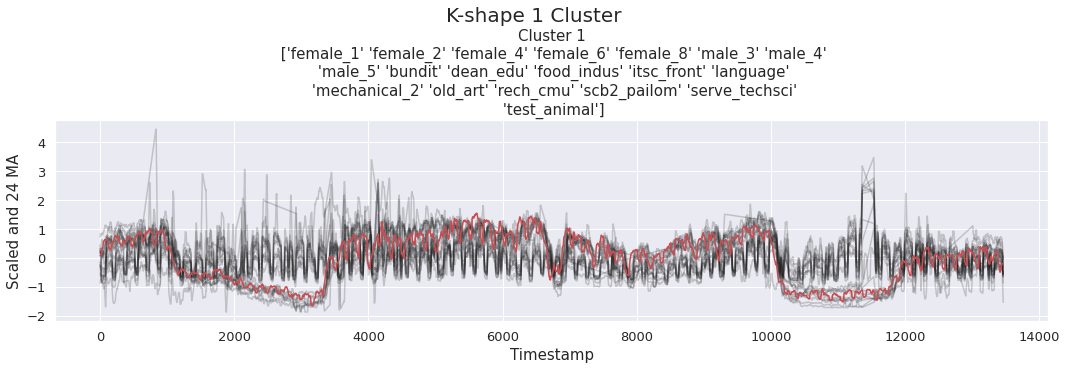

In [ ]:
y_pred = ks1.predict(X)
plot_centroid(ks1, X, y_pred, 'K-shape 1 Cluster', n_rows = 1, n_cols= 1, figsize_x=15, figsize_y=5)

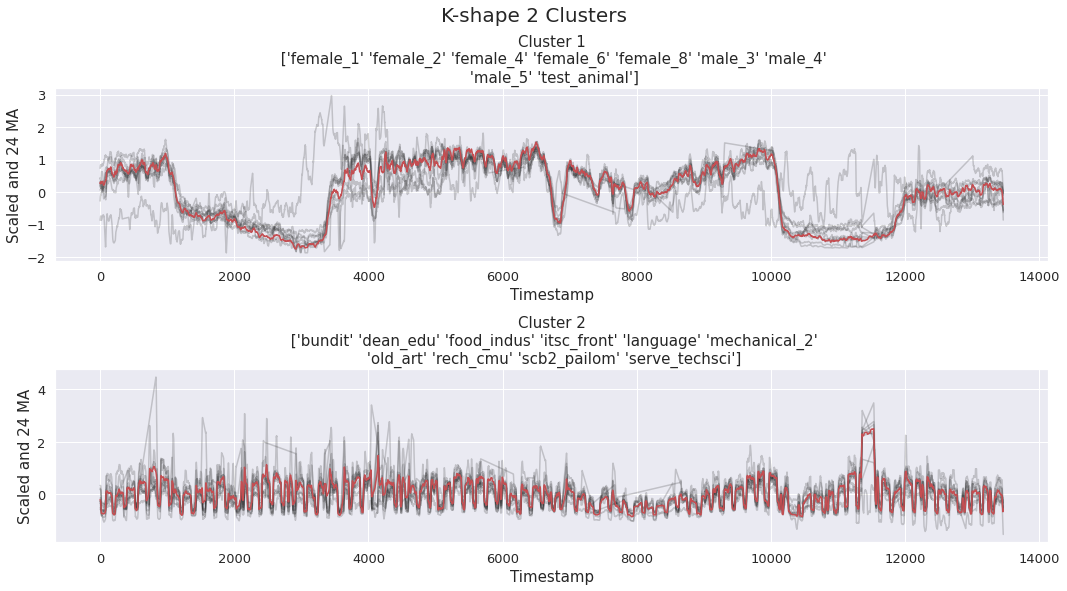

In [ ]:
y_pred = ks2.predict(X)
plot_centroid(ks2, X, y_pred, 'K-shape 2 Clusters', n_rows = 2, n_cols= 1, figsize_x=15, figsize_y=8)

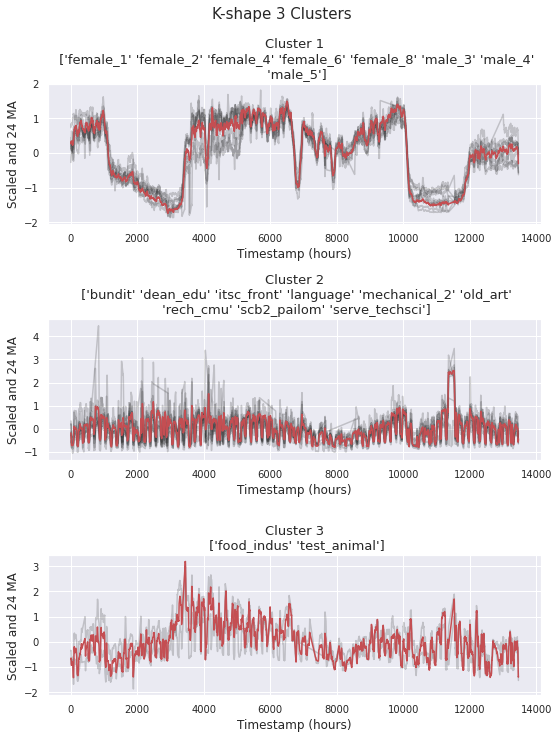

In [16]:
y_pred = ks3.predict(X)
plot_centroid(ks3, X, y_pred, 'K-shape 3 Clusters', n_rows = 3, n_cols= 1, figsize_x=8, figsize_y=10)

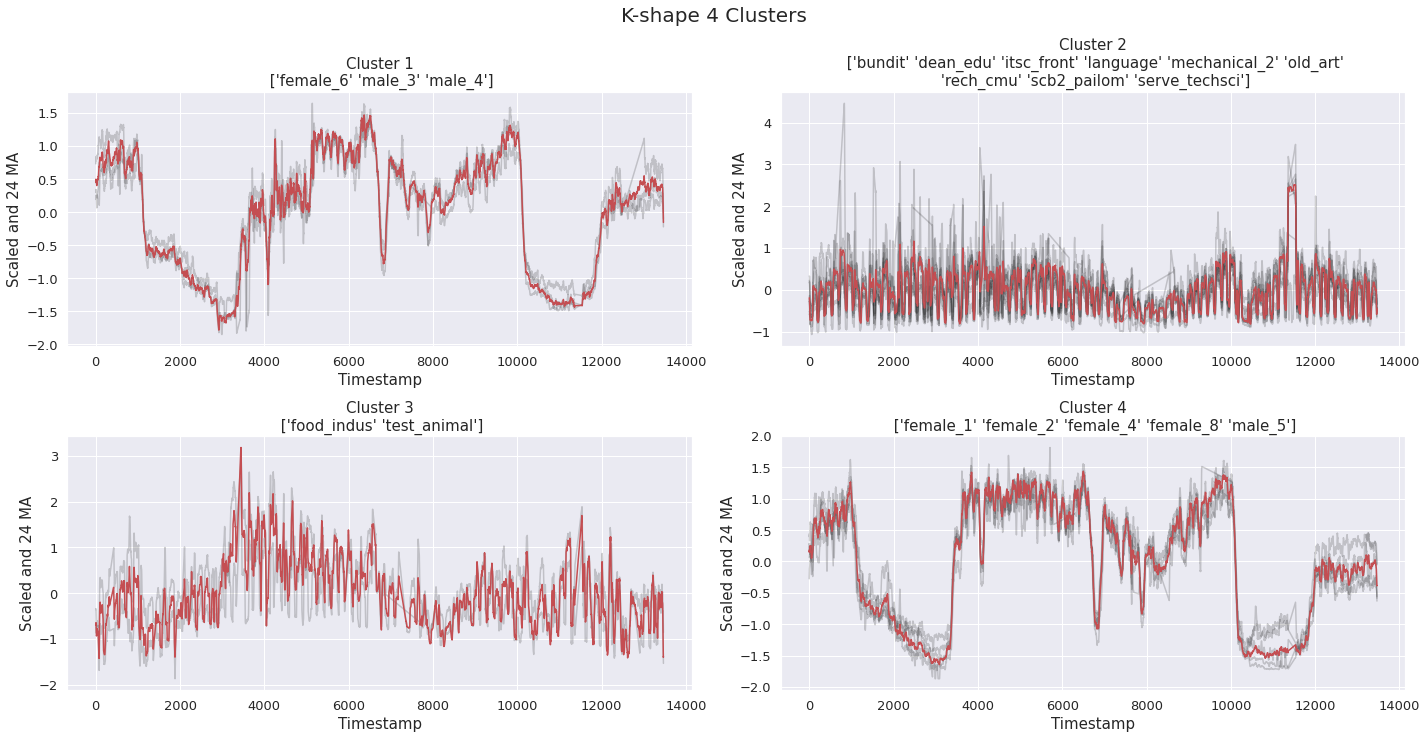

In [ ]:
y_pred = ks4.predict(X)
plot_centroid(ks4, X, y_pred, 'K-shape 4 Clusters', n_rows = 2, n_cols= 2, figsize_x=20, figsize_y=10)

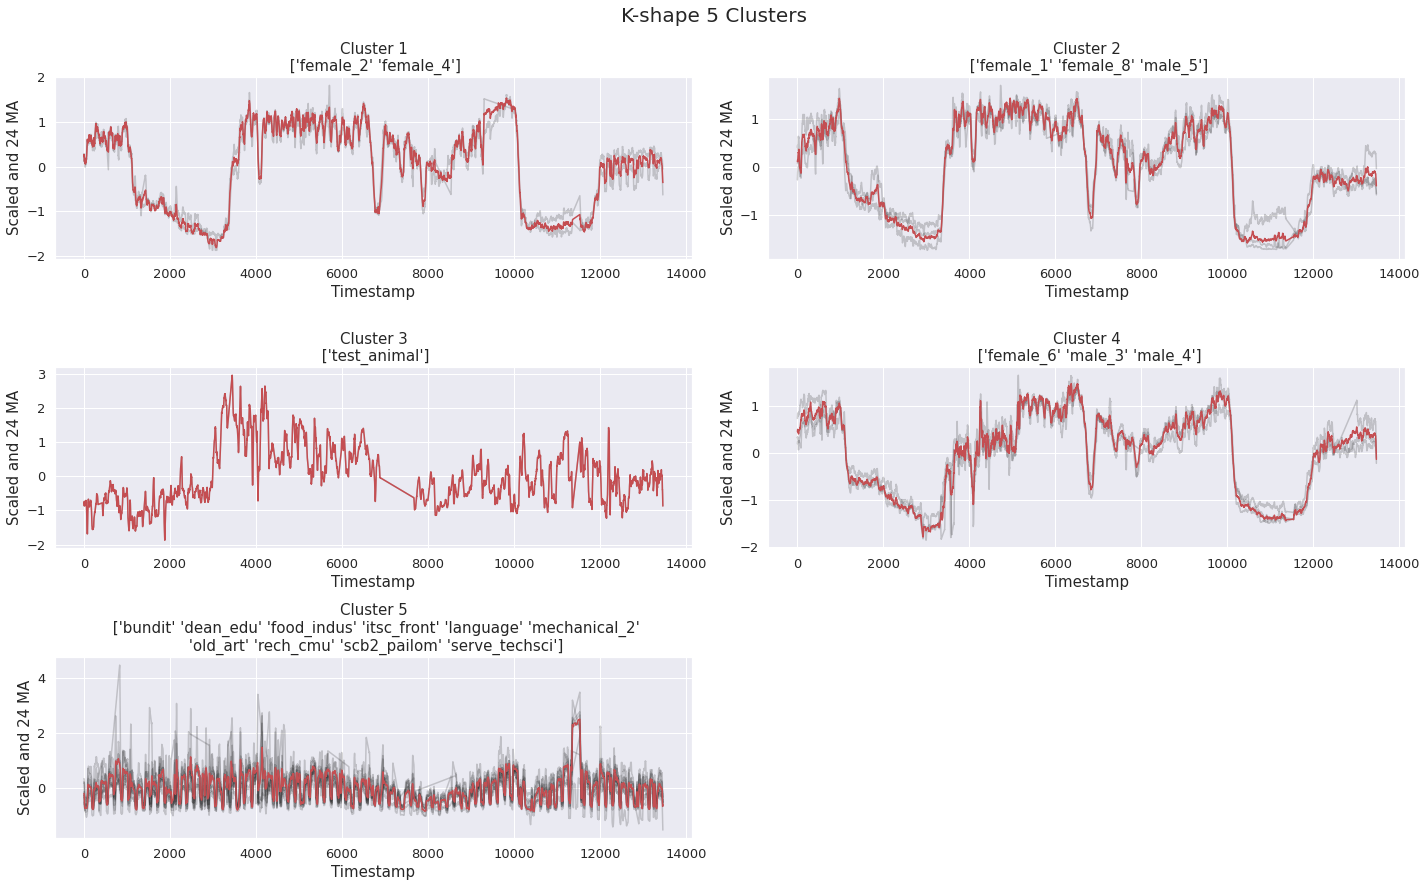

In [ ]:
y_pred = ks5.predict(X)
plot_centroid(ks5, X, y_pred, 'K-shape 5 Clusters', n_rows = 3, n_cols= 2, figsize_x=20, figsize_y=12)

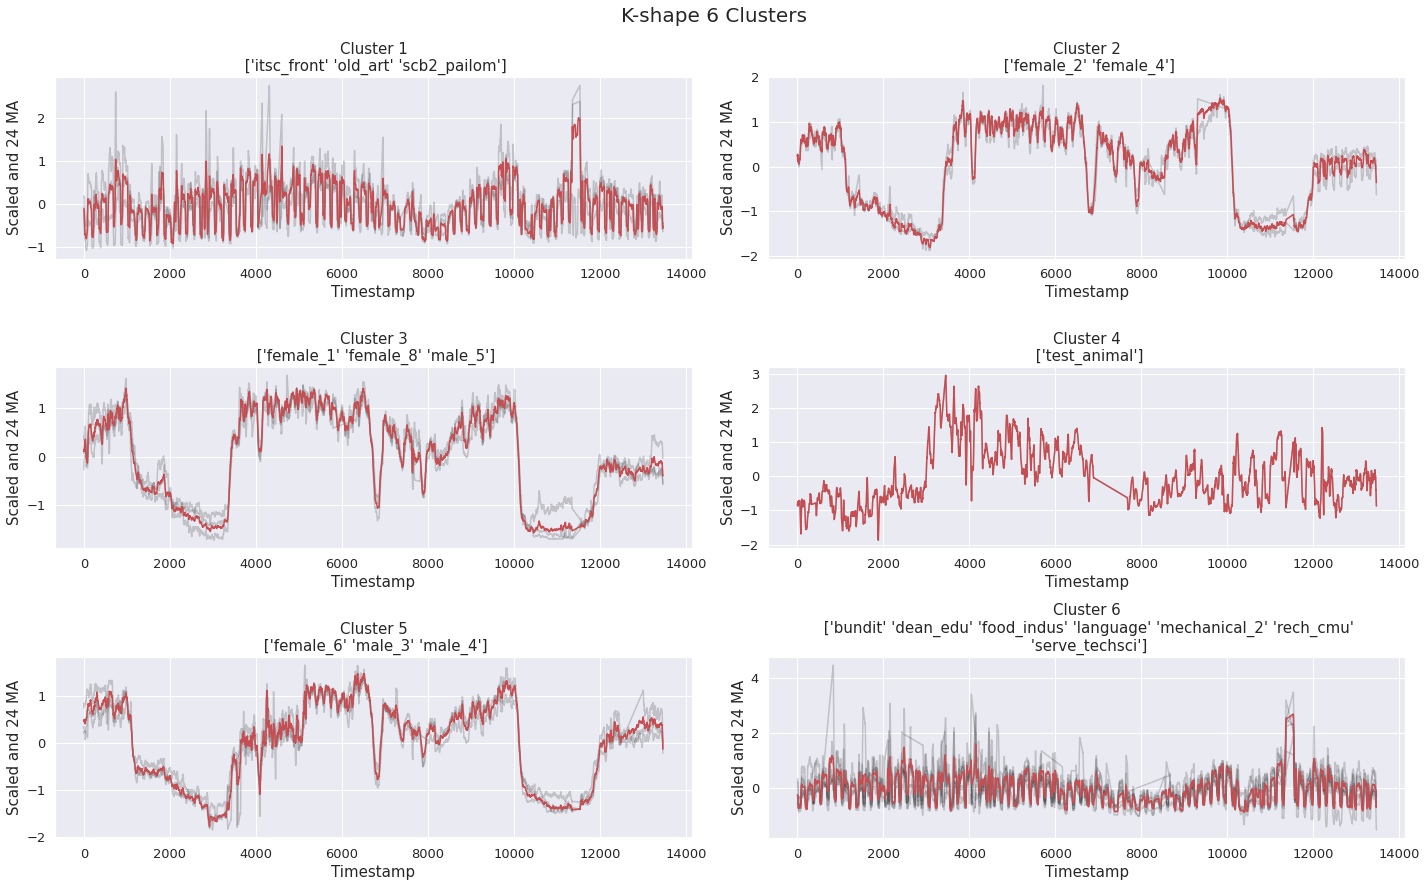

In [ ]:
y_pred = ks6.predict(X)
plot_centroid(ks6, X, y_pred, 'K-shape 6 Clusters', n_rows = 3, n_cols= 2, figsize_x=20, figsize_y=12)

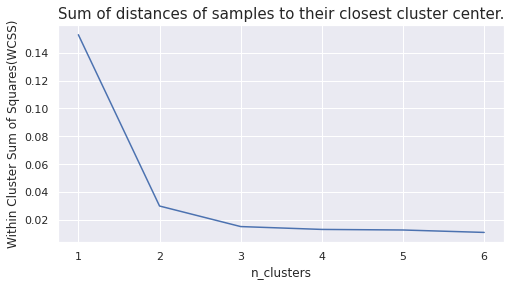

In [15]:
distortions = [model.inertia_ for model in [ks1, ks2, ks3, ks4, ks5, ks6]]
plt.figure(figsize=(8,4))
sns.lineplot(x=np.arange(1,7), y=distortions)
plt.title('Sum of distances of samples to their closest cluster center.', size=15)
plt.xlabel('n_clusters')
plt.ylabel('Within Cluster Sum of Squares(WCSS)')
plt.savefig("elbow.png", bbox_inches='tight')
plt.show()